In [11]:
import pandas as pd
import xarray as xr
import pop_tools
import os
import matplotlib.pyplot as plt
import cmocean.cm as cmo

import gsw                  # compute potential density

In [12]:
df = pd.read_csv('1_std_events_dens_spg.csv')
grouped = df.groupby('Index')

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/'
above_names = ['1_std_TEMP_above.nc','1_std_SALT_above.nc','1_std_SIGMA_above.nc']
below_names = ['1_std_TEMP_below.nc','1_std_SALT_below.nc','1_std_SIGMA_below.nc']

# Check if all files have been processed

In [13]:
# Count the occurrences of each value in the 'Condition' column
condition_counts = df['Condition'].value_counts()

# Print the counts
print(condition_counts)

Above    237
Below     60
Name: Condition, dtype: int64


# Check if files have content

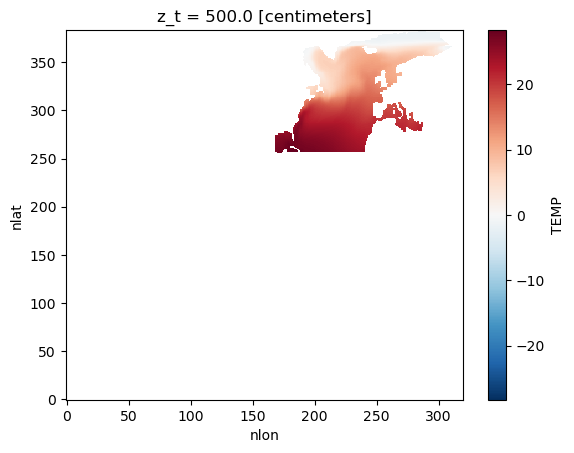

In [14]:
xr.open_dataset(path+above_names[0]).TEMP.isel(time=0, z_t=0).plot()

# Combine all files by taking their average

In [15]:
ds_temp = xr.open_dataset(path+above_names[0])

period1_avg = ds_temp.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_temp.isel(time=slice(45,59)).mean(dim='time')
ds_temp_anom = period2_avg - period1_avg

(250.0, 385.0)

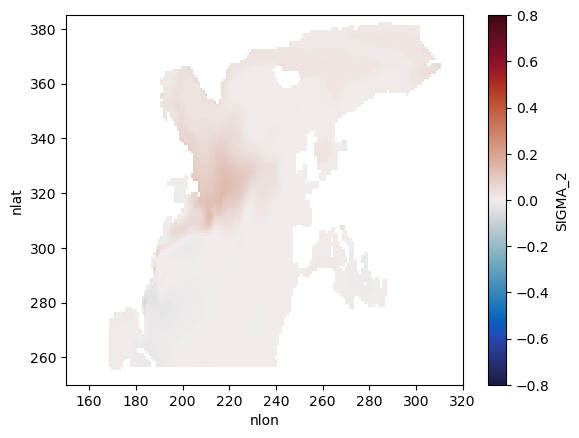

In [16]:
ds_temp_anom.TEMP.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').plot(vmin = -0.8, vmax = 0.8, cmap=cmo.balance)
plt.xlim(150, 320)
plt.ylim(250, 385)

In [21]:
ds_temp = xr.open_dataset(path+below_names[0])

period1_avg = ds_temp.isel(time=slice(0,35)).mean(dim='time')  
period2_avg = ds_temp.isel(time=slice(45,59)).mean(dim='time')
ds_temp_anom = period2_avg - period1_avg

(250.0, 385.0)

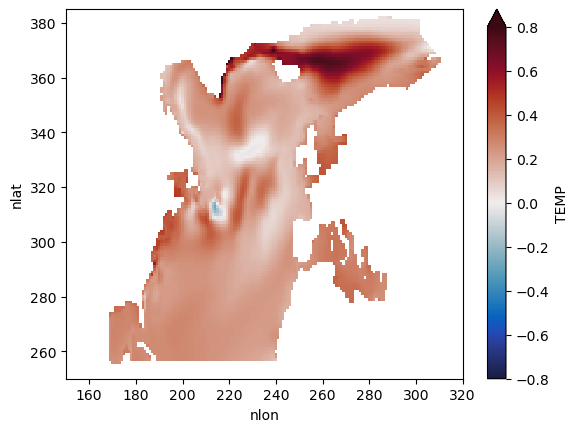

In [22]:
ds_temp_anom.TEMP.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').plot(vmin = -0.8, vmax = 0.8, cmap=cmo.balance)
plt.xlim(150, 320)
plt.ylim(250, 385)